<a href="https://colab.research.google.com/github/lidapmariyam/ICT/blob/main/fish_csv_daily_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [39]:
df = pd.read_csv('/content/fish.csv')

In [40]:
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [41]:
print(df.isnull().sum())

Bream    0
242.0    0
23.2     0
25.4     0
30.0     0
38.4     0
13.4     0
dtype: int64


In [42]:
features = df[['242.0','23.2',	'25.4','30.0']]

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [45]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

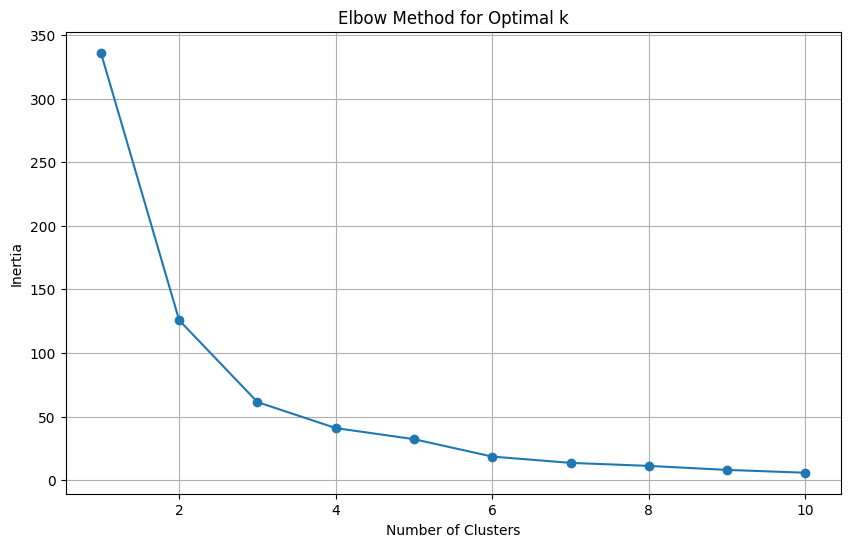

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [47]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [48]:
df['Cluster'] = clusters

In [49]:
numeric_data = df.select_dtypes(include=np.number)
print(numeric_data.groupby('Cluster').mean())

               242.0       23.2       25.4       30.0       38.4       13.4
Cluster                                                                    
0        1295.000000  52.683333  56.516667  60.333333  15.833333  10.600000
1          79.234375  16.125000  17.303125  19.259375  22.375000  12.634375
2         568.521739  31.923913  34.656522  39.280435  33.415217  13.310870


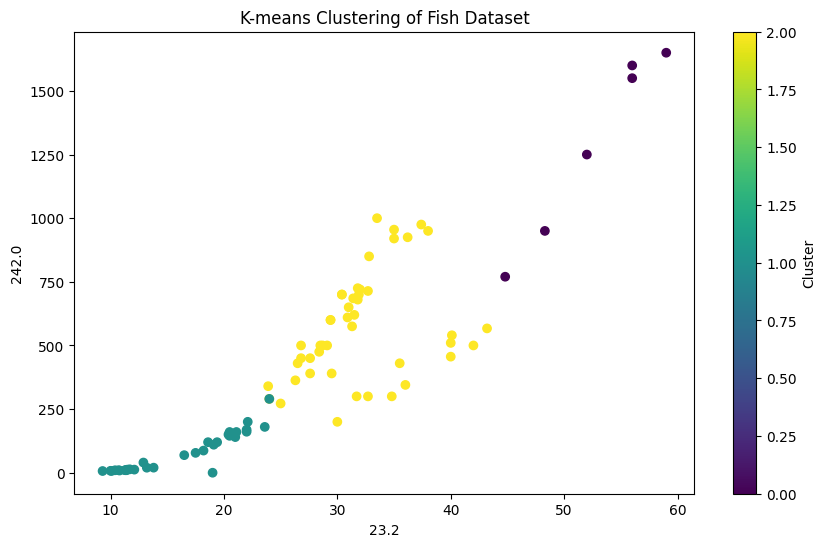

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['23.2'], df['242.0'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Fish Dataset')
plt.xlabel(23.2)
plt.ylabel(242.0)
plt.colorbar(label='Cluster')
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
import seaborn as sns

In [53]:
from sklearn.cluster import AgglomerativeClustering
optimal_clusters = 5
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
df['Agglo_Cluster'] = agglo.fit_predict(scaled_features)

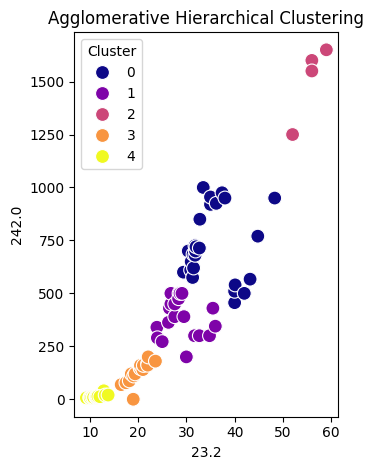

In [54]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='23.2', y='242.0', hue='Agglo_Cluster', palette='plasma', s=100, data=df)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('23.2')
plt.ylabel('242.0')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

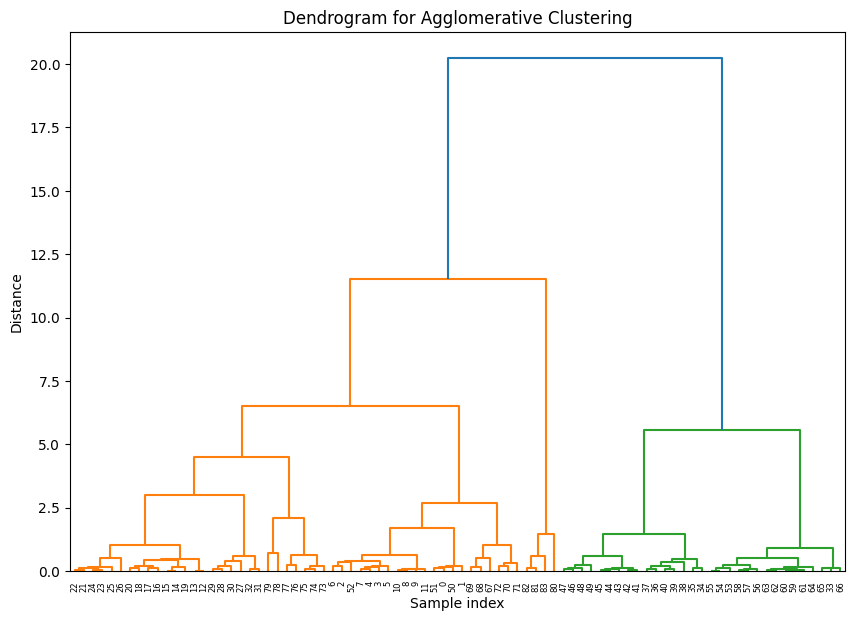

In [56]:

plt.figure(figsize=(10, 7))
linked = linkage(scaled_features, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()